In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import utils as ut
import csv

In [2]:
bleeding_path = "raw_data/bleeding_cases/"

In [3]:
bleeding_path = "raw_data/bleeding_cases/"

# ### renaming patient folders
# for oldname in os.listdir(bleeding_path):
#     newname = oldname.split()[0] + "_" + "{:02.0f}".format(int(oldname.split()[1]))
#     newname = "p"+oldname[1:] #removing capital P
#     os.rename(bleeding_path+oldname, bleeding_path+newname)

# ### renaming file names
# for pfolder in os.listdir(bleeding_path):
#         for fname in os.listdir(bleeding_path+pfolder):
#             fsplit = fname[:-4].split("_")
#             newfname = "{:02.0f}".format(int(fsplit[0])) + "_" + "{:02.0f}".format(int(fsplit[1])) + fname[-4:]
#             os.rename(bleeding_path+pfolder+"/"+fname, bleeding_path+pfolder+"/"+newfname)

In [4]:
total = 0
csvtot = 0
for root, dirs, files in os.walk(bleeding_path): 
    total += len(files)
    csvtot += len([i for i in files if "csv" in i])
print(total, csvtot)

1288 553


In [6]:
bleeding_path = "raw_data/bleeding_cases/"
xywh_arr = np.empty((0,4))
for pfolder in os.listdir(bleeding_path):
    images_p = os.listdir(bleeding_path+pfolder)
    for fname in images_p:
        pathtopatientfile = bleeding_path+pfolder+"/"+fname
        if (".csv" in fname) & (fname[:-4]+".tif" in images_p):
            img = io.imread(pathtopatientfile[:-4]+".tif")
#                 print(fname[:-4], img.shape, utl.read_bbox(pathtopatientfile[:-4]+".csv"))
            xywh_arr = np.vstack((xywh_arr, ut.read_bbox(pathtopatientfile[:-4]+".csv")))

In [46]:
print((x1y1x2y2[:,0]>250).sum())
print((x1y1x2y2[:,1]>250).sum())
print((x1y1x2y2[:,2]>250).sum())
print((x1y1x2y2[:,3]>250).sum())

416
428
507
495


In [17]:
np.vstack((xywh_arr, [utl.read_bbox(pathtopatientfile[:-4]+".csv")])).shape

(1, 4)

## Coordinates in the from of leftTopX, leftTopY, width, height

In [8]:
raw_bleeding_path = "raw_data/bleeding_cases/"
proc_bleeding_path = "proc_data/bleeding_cases/"

for pfolder in os.listdir(raw_bleeding_path):
    for fname in os.listdir(raw_bleeding_path+pfolder):
        read_path = raw_bleeding_path+pfolder+"/"+fname[:-4]
        write_path = proc_bleeding_path+"images800x800/"+fname[:-4]
        if ".csv" in fname:
            try:
                img = io.imread(read_path+".tif")
                bbox = utl.read_bbox(read_path+".csv")
                if img.shape[0]==800:
                    if not os.path.exists(write_path[:-5]): os.makedirs(write_path[:-5])#-5 for 4 dig
                    np.save(write_path+".npy",img)
#                     np.savetxt(write_path+"_bbox.txt", bbox, fmt="%d "+("%f "*4)[:-1])
#                     utl.imgbboxdump(write_path+".jpg", img, bbox)
                elif img.shape[0]==1000:
                    img800 = img[100:900,100:900]
                    bbox800 = [i-100 for i in bbox[:2]] + bbox[2:] 
                    if not os.path.exists(write_path[:-5]): os.makedirs(write_path[:-5])#-5 for 4 dig
#                     np.save(write_path,img)
#                     np.savetxt(write_path+"_bbox.txt", bbox, fmt="%d "+("%f "*4)[:-1])
#                     utl.imgbboxdump(write_path+".jpg", img800, bbox800)
#                 print(fname[:-4], img.shape, utl.read_bbox(pathtopatientfile[:-4]+".csv"))
            except:
                print(fname[:-4],"X"*30) 

01_15 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_17 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_21 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_23 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_25 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_27 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_29 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_31 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_33 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_35 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
01_37 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_08 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_09 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_10 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_11 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_12 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_13 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_14 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_15 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_16 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_17 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_18 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_19 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_20 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_21 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_22 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
04_23 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
0

In [16]:
("%f "*4)[:-1]

'%f %f %f %f'

## YOLO format Data Dump

In [28]:
raw_bleeding_path = "raw_data/bleeding_cases/"
yolo_bleeding_path = "yolo_data/"

for pfolder in os.listdir(raw_bleeding_path):
    for fname in os.listdir(raw_bleeding_path+pfolder):
        read_path = raw_bleeding_path+pfolder+"/"+fname[:-4]
        write_path = yolo_bleeding_path+fname[:-4]
        dw = 1./800
        if ".csv" in fname:
            try:
                img = io.imread(read_path+".tif")
                bbox = utl.read_bbox(read_path+".csv", coord_type="mid")
                if img.shape[0]==800:
                    if not os.path.exists(write_path[:-5]): os.makedirs(write_path[:-5])#-5 for 4 dig
                    io.imsave(write_path+".jpg", img)
                    bbox = [i*dw for i in bbox]
                    with open(write_path+".txt","w") as f: f.write("0 "+" ".join([str(i) for i in bbox]))
                elif img.shape[0]==1000:
                    img800 = img[100:900,100:900]
                    bbox800 = [i-100 for i in bbox[:2]] + bbox[2:] 
                    if not os.path.exists(write_path[:-5]): os.makedirs(write_path[:-5])#-5 for 4 dig
                    io.imsave(write_path+".jpg", img800)
                    bbox800 = [i*dw for i in bbox800]
                    with open(write_path+".txt","w") as f: f.write("0 "+" ".join([str(i) for i in bbox800]))
#                 print(fname[:-4], img.shape, utl.read_bbox(pathtopatientfile[:-4]+".csv"))
            except:
                print(fname[:-4],"X"*30) 

57_16 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
60_24 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
67_21 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
73_60 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


#### Visualize yolo format data to make sure thr bbox format

In [1]:
def yolo_bbx_viz(image_path, bbox_path):
    """
    expects that the bbox is in xymiwh format, size of image is 800x800
    """
    image = io.imread(image_path)
    with open(bbox_path,"r") as f: bbox = f.read()
    bbx = [int(float(i)*800) for i in bbox.split()[1:]]
    ## above are supposed to be mid-wh

    fig1, ax1 = plt.subplots(figsize = (15,5))
    # Rectangle takes bottom-left coords (bottom in terms of data coordinates, as the y axis is flipped, its top left visually)
    bottom_left = (bbx[0]-bbx[2]/2.,bbx[1]-bbx[3]/2.)
    ax1.add_patch(Rectangle(xy=bottom_left, width=bbx[2], height=bbx[3],linewidth=1,edgecolor='r',facecolor='none'))
    ax1.imshow(image, cmap = "gray")

In [ ]:
yolo_bleeding_path = "yolo_data/"
image_path = yolo_bleeding_path+"49_19_n.jpg"
bbox_path = yolo_bleeding_path+"49_19_n.txt"

check_bbox_viz(image_path, bbox_path)

In [58]:
#### Renaming the files with an "_orig" in the end to signify the original one!

# yolo_bleeding_path = "yolo_data/"

# for file in os.listdir(yolo_bleeding_path):
#     os.rename(yolo_bleeding_path+file, yolo_bleeding_path+file[:-4]+"_orig"+file[-4:])

### Image Augmentation

- `_n` - only noise added

Flip Hz, Vl
- `_hf`
- `_vf`
- `_hfn`
- `_vfn`


Left, Right, Top, Bottom shifts. and them with noise added
- `_ls`
- `_ts`
- `_rs`
- `_bs`
- `_lsn`
- `_tsn`
- `_rsn`
- `_bsn`

List of Augmentations that can be done - 
- AdditiveGaussian
- Fliplr
- Flipud
- Affine
- 

In [73]:
def aug_images(aug_seq, aug_idf):
    yolo_bleeding_path = "yolo_data/"
    for file in os.listdir(yolo_bleeding_path):
        if ".jpg" in file:
            if "_orig" in file:
                img = io.imread(yolo_bleeding_path+file)
                aug_img = aug_seq.augment_image(img)
                io.imsave((yolo_bleeding_path+file).replace("_orig",aug_idf), aug_img)
        if ".txt" in file:
            if "_orig" in file:
                with open(yolo_bleeding_path+file,"r") as f: bbox = f.read()
                bbx = [int(float(i)*800) for i in bbox.split()[1:]]
                ## above are supposed to be mid-wh
                top_left = [bbx[0]-bbx[2]/2.,bbx[1]+bbx[3]/2.]
                bottom_right = [bbx[0]+bbx[2]/2.,bbx[1]-bbx[3]/2.]

                bbx_tlbr = ia.BoundingBoxesOnImage.from_xyxy_array(xyxy=np.array([top_left+bottom_right]),shape=img.shape)
                bb_aug = aug_seq.augment_bounding_boxes([bbx_tlbr])
                bb_aug = list(bb_aug[0].to_xyxy_array()[0])
                bb_aug_xymiwh = [(bb_aug[0]+bb_aug[2])/2., (bb_aug[1]+bb_aug[3])/2., bb_aug[2]-bb_aug[0], bb_aug[3] - bb_aug[1]] 
                bb_yolo = "0 "+" ".join([str(i/800.) for i in bb_aug_xymiwh])
                with open((yolo_bleeding_path+file).replace("_orig",aug_idf),"w") as f: f.write(bb_yolo)

In [74]:
gnoise = lambda : iaa.AdditiveGaussianNoise(scale=(0.05*255))
hflip = lambda : iaa.Fliplr(1)
vflip = lambda : iaa.Flipud(1)
shift = lambda x,y : iaa.Affine( translate_px={"x": x, "y": y})


aug_dict = {

"_n" : iaa.Sequential([gnoise()]),

"_hf" : iaa.Sequential([hflip()]),
"_hfn" : iaa.Sequential([hflip(), gnoise()]),

"_vf" : iaa.Sequential([vflip()]),
"_vfn" : iaa.Sequential([vflip(), gnoise()]),

"_ls" : iaa.Sequential([shift(x=-20, y=0)]),
"_lsn" : iaa.Sequential([shift(x=-20, y=0), gnoise()]),

"_rs" : iaa.Sequential([shift(x=20, y=0)]),
"_rsn" : iaa.Sequential([shift(x=20, y=0), gnoise()]),

"_ts" : iaa.Sequential([shift(x=0, y=20)]),
"_tsn" : iaa.Sequential([shift(x=0, y=20), gnoise()]),

"_bs" : iaa.Sequential([shift(x=0, y=-20)]),
"_bsn" : iaa.Sequential([shift(x=0, y=-20), gnoise()]),

}

In [75]:
for idf_i,seq_i in aug_dict.items():
    aug_images(seq_i, idf_i)

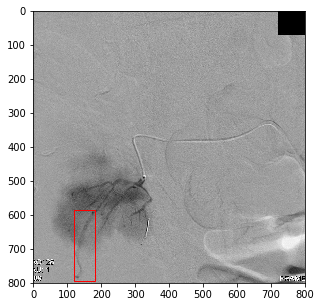

In [76]:
yolo_bleeding_path = "yolo_data/"
image_path = yolo_bleeding_path+"49_19_orig.jpg"
bbox_path = yolo_bleeding_path+"49_19_orig.txt"

yolo_bbx_viz(image_path, bbox_path)

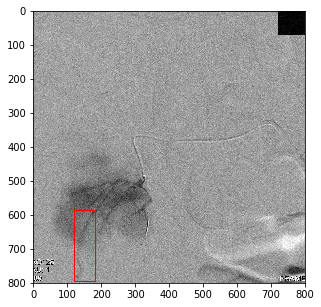

In [77]:
yolo_bleeding_path = "yolo_data/"
image_path = yolo_bleeding_path+"49_19_n.jpg"
bbox_path = yolo_bleeding_path+"49_19_n.txt"

yolo_bbx_viz(image_path, bbox_path)

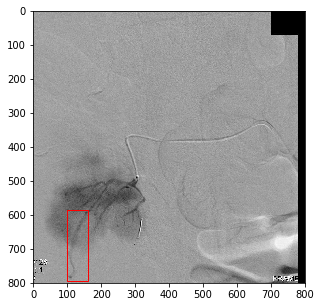

In [78]:
yolo_bleeding_path = "yolo_data/"
image_path = yolo_bleeding_path+"49_19_ls.jpg"
bbox_path = yolo_bleeding_path+"49_19_ls.txt"

yolo_bbx_viz(image_path, bbox_path)

In [48]:
lb = [0]*3

In [49]:
lb[1:] = [2,3]

In [50]:
lb

[0, 2, 3]